In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
dataset = pd.read_csv('Laptop_price.csv')
dataset.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [160]:
dataset.info()

dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [161]:
dataset.shape

(1000, 7)

In [162]:
dataset.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

In [163]:
dataset.isna().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [164]:
dataset.duplicated().sum()

0

In [165]:
dataset['Screen_Size'] = dataset['Screen_Size'].astype(int)
dataset.dtypes

Brand                object
Processor_Speed     float64
RAM_Size              int64
Storage_Capacity      int64
Screen_Size           int32
Weight              float64
Price               float64
dtype: object

In [166]:
dataset = dataset.drop(['Weight'], axis = 1)
dataset.head(2)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Price
0,Asus,3.830296,16,512,11,17395.093065
1,Acer,2.912833,4,1000,11,31607.605919


In [167]:
dataset['Brand'].value_counts().sort_values(ascending=False)

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

In [168]:
sns.set(style='dark')

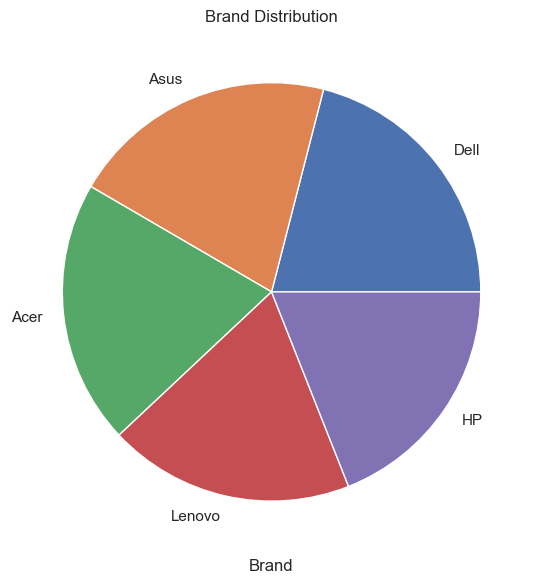

In [169]:
dataset['Brand'].value_counts().sort_values(ascending=False).plot(kind='pie', figsize=(10,6), color=['blue', 'darkred'])
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

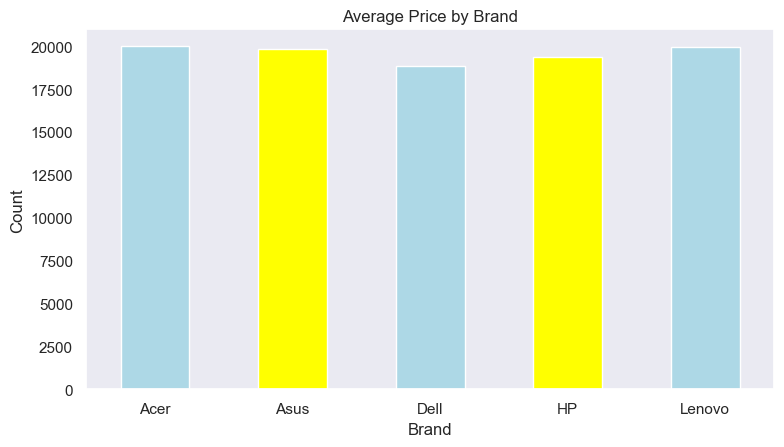

In [170]:
dataset.groupby('Brand')['Price'].mean().plot(kind='bar', figsize=(8, 5), color=['lightblue', 'yellow'])
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation = 0)
plt.show()

In [171]:
dataset.groupby(['RAM_Size', 'Storage_Capacity'])['Price'].mean()

RAM_Size  Storage_Capacity
4         256                  9171.997856
          512                 16855.009374
          1000                31455.561713
8         256                  9393.447408
          512                 17023.751694
          1000                31649.586551
16        256                  9804.380306
          512                 17485.053381
          1000                32095.067868
32        256                 10591.302212
          512                 18257.374258
          1000                32875.202727
Name: Price, dtype: float64

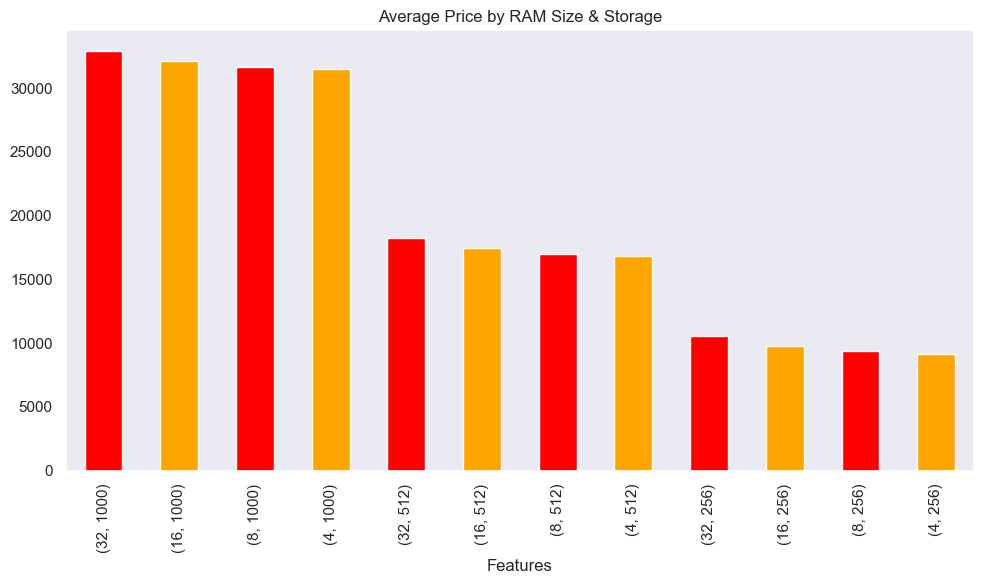

In [172]:
dataset.groupby(['RAM_Size', 'Storage_Capacity'])['Price'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,6), color=['red', 'orange'])
plt.title('Average Price by RAM Size & Storage')
plt.xlabel('Features')
plt.ylabel('')
plt.tight_layout()
plt.show()

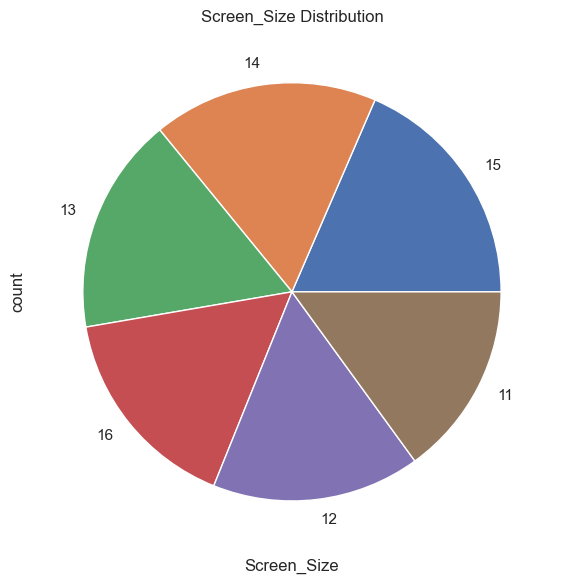

In [173]:
dataset['Screen_Size'].value_counts().plot(kind='pie', figsize=(10,6), color = ['teal', 'pink'])
plt.title('Screen_Size Distribution')
plt.xlabel('Screen_Size')
plt.tight_layout()
plt.show()

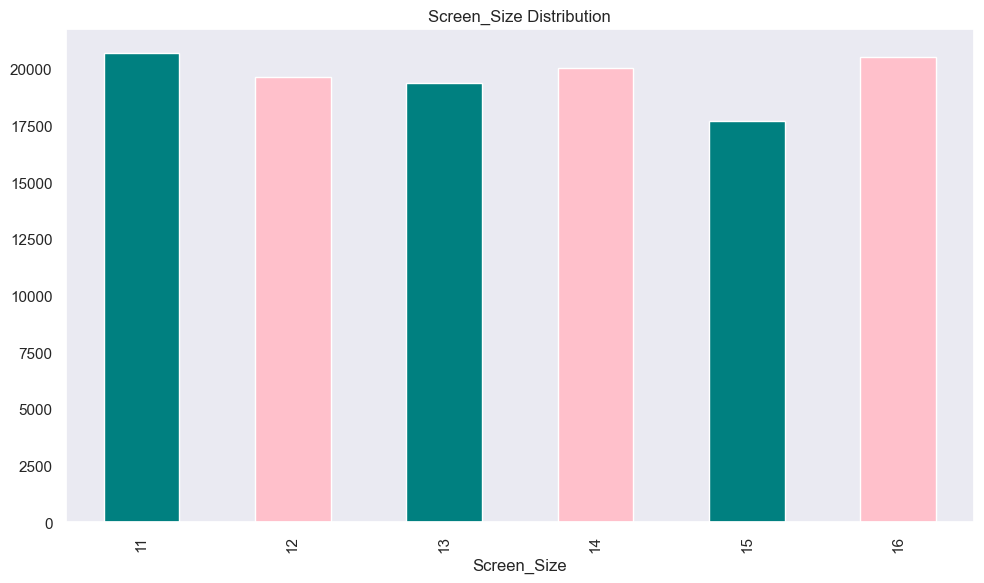

In [174]:
dataset.groupby('Screen_Size')['Price'].mean().plot(kind='bar', figsize=(10,6), color = ['teal', 'pink'])
plt.title('Screen_Size Distribution')
plt.xlabel('Screen_Size')
plt.tight_layout()
plt.show()

In [175]:
dataset.head(2)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Price
0,Asus,3.830296,16,512,11,17395.093065
1,Acer,2.912833,4,1000,11,31607.605919


In [176]:
import warnings
warnings.filterwarnings('ignore')

dataset = pd.get_dummies(dataset, columns=['Brand'], drop_first=True)

In [177]:
dataset.head(2)

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Price,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,3.830296,16,512,11,17395.093065,True,False,False,False
1,2.912833,4,1000,11,31607.605919,False,False,False,False


In [178]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x = dataset.drop('Price', axis=1)
y = dataset['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rfr_model = RandomForestRegressor(n_estimators=200, random_state=42)
rfr_model.fit(x_train, y_train)

y_pred = rfr_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2:", r2_score(y_test, y_pred))

MAE: 176.2407626990324
RMSE: 213.24275802166855
R2: 0.9994991828063243


In [179]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train, y_train)

y_pred = dtr_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2:", r2_score(y_test, y_pred))

MAE: 226.61509043742038
RMSE: 280.5340838082233
R2: 0.9991332339021308


In [180]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2:", r2_score(y_test, y_pred))

MAE: 146.2024693166563
RMSE: 179.79022265701843
R2: 0.9996439895147972


In [181]:
y_pred = lr_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.to_numpy().reshape(len(y_test), 1)), axis=1))

[[10729.26827109 10900.5020747 ]
 [31550.03874757 31727.51669713]
 [ 9632.02199522  9636.02275023]
 [ 9263.05147148  9412.59985713]
 [32028.00721622 31641.10586087]
 [31650.06848926 31832.48694288]
 [10325.8482497  10438.45156758]
 [16966.80789752 17205.20567922]
 [18497.54820095 18743.56939203]
 [32368.14987243 32342.7058624 ]
 [ 9919.34996442 10194.66237311]
 [10605.94420223 10514.8892457 ]
 [32913.32793597 32761.71742684]
 [ 9279.19325004  9376.58499437]
 [17255.84476536 17306.62414221]
 [ 8974.26844226  8780.66081214]
 [32077.30512545 32039.04200238]
 [32217.28766919 32242.39494102]
 [10482.01558344 10573.85856037]
 [31655.47679363 31916.07446804]
 [10603.18416833 10359.76290815]
 [10654.5390329  10869.93626509]
 [ 9159.56538729  9405.3300985 ]
 [10375.17319609 10350.81452551]
 [ 9486.48427493  9346.06457358]
 [17512.70780044 17595.70911438]
 [10711.20631409 11055.04524004]
 [18281.93651241 18028.99908089]
 [10796.31534945 10776.32666945]
 [32675.1084581  32513.47571532]
 [16871.73

In [182]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_model, x, y, cv=5)
print("Cross Val Accuracy:", scores.mean(), scores.std())

Cross Val Accuracy: 0.9995574072459006 6.74358558813013e-05


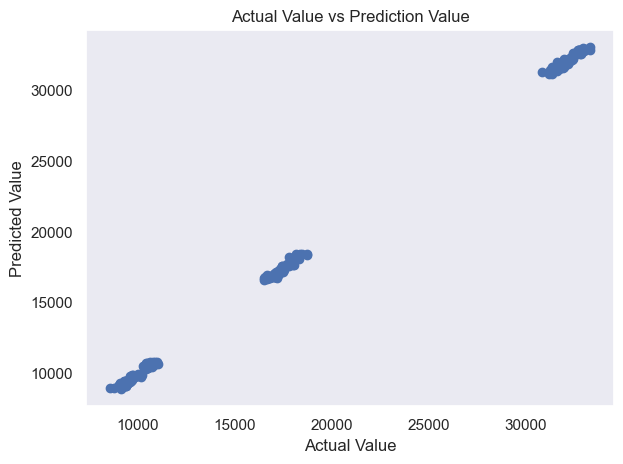

In [185]:
plt.scatter(y_test, y_pred)
plt.title('Actual Value vs Prediction Value')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.tight_layout()
plt.show()

In [186]:
x

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,3.830296,16,512,11,True,False,False,False
1,2.912833,4,1000,11,False,False,False,False
2,3.241627,4,256,11,False,False,False,True
3,3.806248,16,512,12,False,False,False,False
4,3.268097,32,1000,14,False,False,False,False
...,...,...,...,...,...,...,...,...
995,3.343584,4,1000,12,False,False,True,False
996,2.780555,8,256,12,False,True,False,False
997,3.200569,4,512,12,False,True,False,False
998,1.604182,8,256,11,True,False,False,False


In [187]:
y

0      17395.093065
1      31607.605919
2       9291.023542
3      17436.728334
4      32917.990718
           ...     
995    31593.668017
996     9149.521832
997    16552.404779
998     9407.473459
999     8807.696702
Name: Price, Length: 1000, dtype: float64

In [192]:
user_input = [[3.3, 4, 1000, 12, 0, 0, 1, 0]]
prediction = lr_model.predict(user_input)[0]
print(f'Predicted Price: {prediction:.2f}')

Predicted Price: 31556.55
